Используемые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Исходные функции и их градиенты:

In [2]:
def f(x):
    return 2 * x[0]**2 + 3 * x[1]**2

def grad_f(x):
    return np.array([4 * x[0], 6 * x[1]])

def g(x):
    return 2*x[0]**2 - x[0]*x[1] + 3*x[1]**2 + 4*x[0] + 5*x[1] + 6

def grad_g(x):
    return np.array([4*x[0]-x[1]+4, -x[0]+6*x[1]+5])

def h(x):
    return 3*x[0]**2 + 2*x[0]*x[1] + 2*x[1]**2

def grad_h(x):
    return np.array([6*x[0] + 2*x[1], 2*x[0] + 4*x[1]])

Реализация градиентого спуска с постоянным шагом:

In [3]:
def gradient_descent_constant_step_size(f, grad_f, x0, learning_rate, max_iterations=1000, tol=1e-6):
    # Initialize variables and lists to keep track of evaluations and trajectory
    evals = 0
    g_evals = 0
    x = x0
    trajectory = [x]
    # Evaluate the function at the initial point
    fx = f(x)
    evals += 1

    # Loop over a maximum number of iterations or until the convergence criterion is met
    for i in range(max_iterations):
        # Compute the gradient of the function at the current point
        grad_x = grad_f(x)
        g_evals += 1
        # Update the current point by taking a step in the direction of the negative gradient
        x_new = x - learning_rate * grad_x
        # Add the new point to the trajectory
        trajectory.append(x_new)
        # Evaluate the function at the new point
        fx_new = f(x_new)
        evals += 1
        # Check for convergence by comparing the difference in function values between iterations to a tolerance
        if abs(fx_new - fx) < tol:
            # If the convergence criterion is met, break out of the loop
            break
        # If the convergence criterion is not met, update the current point and function value for the next iteration
        x, fx = x_new, fx_new

    # Return the trajectory of points visited during optimization, as well as the number of function and gradient evaluations
    return np.array(trajectory), evals, g_evals

Работа градиентного спуска с постоянным шагом:

Gradient descent with a constant step
Minimum value of the function: 5.157215941020123e-07
Point of minimum value: [5.07799783e-04 3.43597384e-07]


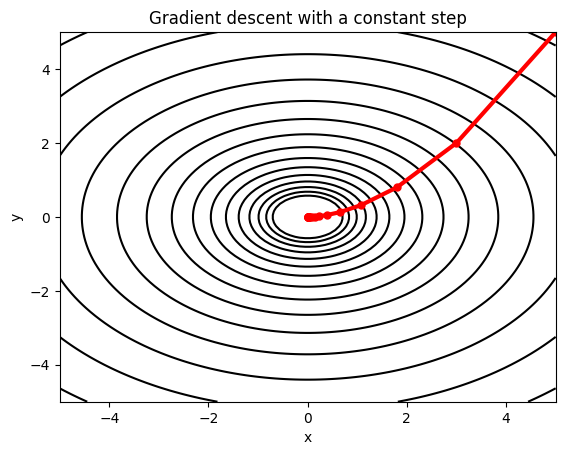

In [4]:
starting_point = np.array([5, 5])
learning_rate = 0.1

trajectory, _, _ = gradient_descent_constant_step_size(f, grad_f, starting_point, learning_rate)

print("Gradient descent with a constant step")
print("Minimum value of the function:", f(trajectory[-1]))
print("Point of minimum value:", trajectory[-1])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='gray')
plt.plot(trajectory[:,0], trajectory[:,1], '-o', markersize=5, linewidth=3, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient descent with a constant step")
plt.show()

Реализация градиентного спуска с дроблением шага, используя условие Армихо:

In [5]:
def gradient_descent_armijo(f, grad_f, x0, tol=1e-6, max_iter=1000, alpha_init=1, c=0.4):
    # Initialize variables and lists to keep track of evaluations and trajectory
    evals = 0
    g_evals = 0
    x = x0
    trajectory = [x]
    # Evaluate the function at the initial point
    fx = f(x)
    evals += 1

    # Loop over a maximum number of iterations or until the convergence criterion is met
    for i in range(max_iter):
        # Compute the negative gradient of the function at the current point
        g_evals += 1
        p = -grad_f(x)
        # Initialize the step size alpha and the function value at the new point
        alpha = alpha_init
        fx_new = f(x + alpha * p)
        evals += 1

        # Backtracking line search using Armijo condition
        while fx_new > fx + c * alpha * np.dot(-p, p):
            # If the Armijo condition is not satisfied, reduce the step size by a factor of 2 and re-evaluate the function
            alpha /= 2
            fx_new = f(x + alpha * p)
            evals += 1

        # Update the current point by taking a step in the direction of the negative gradient with the computed step size
        x_new = x + alpha * p
        # Add the new point to the trajectory
        trajectory.append(x_new)
        # Check for convergence by comparing the difference in function values between iterations to a tolerance
        if abs(fx_new - fx) < tol:
            # If the convergence criterion is met, break out of the loop
            break
        # If the convergence criterion is not met, update the current point and function value for the next iteration
        x = x_new
        fx = fx_new
        evals += 1

    # Return the trajectory of points visited during optimization, as well as the number of function and gradient evaluations
    return np.array(trajectory), evals, g_evals

Работа градиентного спуска с дроблением шага, используя условие Армихо:

Gradient descent with step splitting with Armiho condition
Minimum value of the function: 4.3655745685100555e-09
Point of minimum value: [ 0.00000000e+00 -3.81469727e-05]


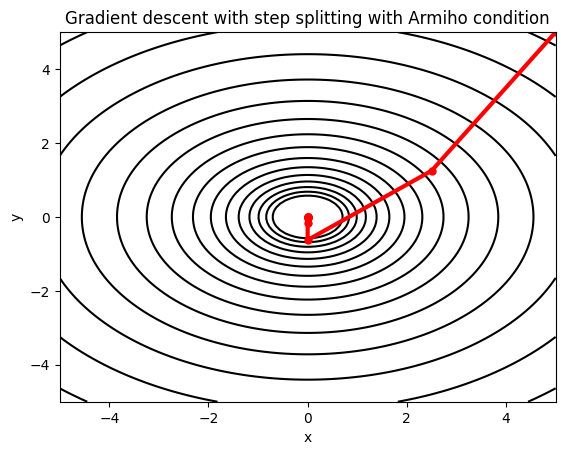

In [6]:
starting_point = np.array([5, 5])
trajectory, _, _ = gradient_descent_armijo(f, grad_f, starting_point)

print("Gradient descent with step splitting with Armiho condition")
print("Minimum value of the function:", f(trajectory[-1]))
print("Point of minimum value:", trajectory[-1])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='gray')
plt.plot(trajectory[:,0], trajectory[:,1], '-o', markersize=5, linewidth=3, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient descent with step splitting with Armiho condition")
plt.show()

Реализация комбинированного метода Брента для наискорейшего спуска:

In [7]:
def brent_method(a, c, tol, f):
    # Initialize variables
    evals = 0
    k = (3 - np.sqrt(5)) / 2  # constant used for parabolic interpolation
    x = w = v = (a + c) / 2  # x, w, and v are three points used for interpolation
    fx = fw = fv = f(x)  # f(x), f(w), and f(v) are the function values at the three points
    evals += 1
    d = e = c - a  # d and e are variables used for tracking the size of the bracket

    while abs(x - (a + c) / 2) + (c - a) / 2 > 2 * tol:
        g, e = e, d  # save the size of the bracket before the last iteration
        u = 0
        # Check if we need to perform a parabolic approximation
        if x != w and x != v and w != v and fx != fw and fx != fv and fw != fv:
            u = ((w - x) ** 2 * (fx - fv) - (x - v) ** 2 * (fx - fw)) / (2 * ((w - x) * (fx - fv) - (x - v) * (fx - fw)))
        if a + tol <= u <= c - tol and abs(u - x) < g / 2:
            d = abs(u - x) # update the size of the bracket
        else: #use golden section
            if x < (a + c) / 2:
                u = x + k * (c - x)
                d = c - x
            else:
                u = x - k * (x - a)
                d = x - a
        if abs(u - x) < tol:
            u = x + np.copysign(tol, u - x)  # enforce the minimum step size
        fu = f(u)
        evals += 1
        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, fu
        else:
            if u >= x:
                c = u
            else:
                a = u
            if fu <= fw or w == x:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == x or v == w:
                v, fv = u, fu
    return x, evals

Реализация наискорейшего спуска, используя метод Брента:

In [8]:
def gradient_descent_brent(f, grad_f, x0, tol=1e-6, max_iter=1000):
    # Initialize variables and lists to keep track of evaluations and trajectory
    evals = 0
    g_evals = 0
    x = x0
    trajectory = [x]
    # Evaluate the function at the initial point
    fx = f(x)
    evals += 1

    # Loop over a maximum number of iterations or until the convergence criterion is met
    for i in range(max_iter):
        # Compute the gradient of the function at the current point
        grad = grad_f(x)
        g_evals += 1

        # Define a one-dimensional function to minimize using Brent's method
        def phi(alpha):
            return f(x - alpha * grad)

        # Minimize the one-dimensional function using Brent's method
        alpha_min, evals_new = brent_method(0, 1, tol=1e-1, f=phi)
        evals += evals_new

        # Update the current point by taking a step in the direction of the negative gradient with the computed step size
        x_new = x - alpha_min * grad
        # Evaluate the function at the new point
        fx_new = f(x_new)
        evals += 1
        # Check for convergence by comparing the difference in function values between iterations to a tolerance
        if abs(fx_new - fx) < tol:
            # If the convergence criterion is met, break out of the loop
            break
        # If the convergence criterion is not met, update the current point and function value for the next iteration
        x = x_new
        fx = fx_new
        # Add the new point to the trajectory
        trajectory.append(x)

    # Return the trajectory of points visited during optimization, as well as the number of function and gradient evaluations
    return np.array(trajectory), evals, g_evals

Работа наискорейшего спуска, используя метод Брента:

The fastest gradient descent
Minimum value of the function: 8.361057193236942e-08
Point of minimum value: [ 2.04281745e-04 -7.03584199e-06]


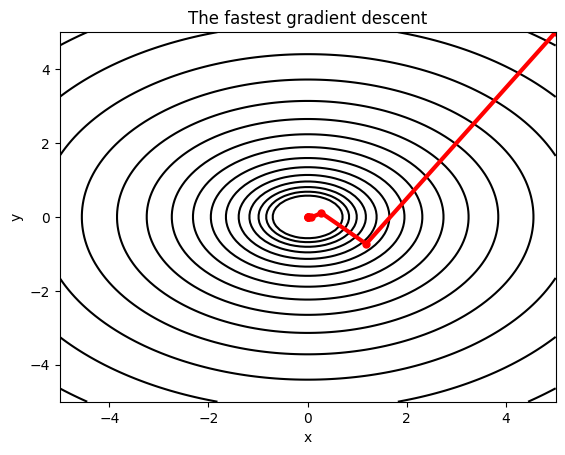

In [9]:
starting_point = np.array([5, 5])
trajectory, _, _ = gradient_descent_brent(f, grad_f, starting_point)

print("The fastest gradient descent")
print("Minimum value of the function:", f(trajectory[-1]))
print("Point of minimum value:", trajectory[-1])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='gray')
plt.plot(trajectory[:,0], trajectory[:,1], '-o', markersize=5, linewidth=3, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("The fastest gradient descent")
plt.show()

Реализация метода сопряженных градиентов:

In [10]:
def conjugate_gradient(f, grad_f, x0, tol=1e-6, max_iter=1000000):
    # Initialize counters for function and gradient evaluations
    evals = 0
    g_evals = 0

    # Initialize starting point and trajectory list
    x = x0
    trajectory = [x]

    # Compute gradient and evaluate function at starting point
    g = grad_f(x)
    g_evals += 1
    fx = f(x)
    evals += 1

    # Initialize search direction
    d = -g

    # Loop until convergence or maximum iterations reached
    for i in range(max_iter):
        # Perform line search to find optimal step size
        alpha, new_evals, new_g_evals = line_search(f, x, d, fx, g)
        evals += new_evals
        g_evals += new_g_evals

        # Update x and evaluate function and gradient at new point
        x_new = x + alpha * d
        fx_new = f(x_new)
        evals += 1
        g_new = grad_f(x_new)
        g_evals += 1

        # Compute beta for updating search direction
        if np.dot(g, g) == 0:
            beta = 0
        else:
            beta = np.dot(g_new, g_new - g) / np.dot(g, g)

        # Update search direction
        d_new = -g_new + beta * d

        # Check for convergence
        if abs(fx_new - fx) < tol:
            break

        # Update variables for next iteration
        x, g, d, fx = x_new, g_new, d_new, fx_new
        trajectory.append(x)

    # Return trajectory, function and gradient evaluations
    return np.array(trajectory), evals, g_evals


def line_search(f, x, d, f_x, grad_f_x, alpha_init=1, c=0.4):
    # Initialize counters for function and gradient evaluations
    g_evals = 0
    evals = 0

    # Initialize step size and evaluate function and gradient at current point
    alpha = alpha_init

    # Backtracking line search
    while f(x + alpha * d) > f_x + c * alpha * np.dot(grad_f_x, d):
        # Update step size and evaluate function at new point
        evals += 1
        alpha /= 2

    # Return optimal step size and function/gradient evaluations
    return alpha, evals, g_evals

Работа метода сопряженных градиентов:

Сonjugate gradient method
Minimum value of the function: 1.064146083906772e-06
Point of minimum value: [-0.00032002  0.0005352 ]


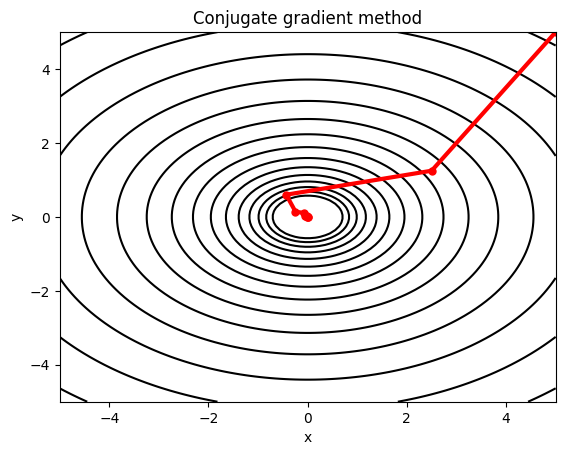

In [11]:
starting_point = np.array([5, 5])
trajectory, _, _ = conjugate_gradient(f, grad_f, starting_point)

print("Сonjugate gradient method")
print("Minimum value of the function:", f(trajectory[-1]))
print("Point of minimum value:", trajectory[-1])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='gray')
plt.plot(trajectory[:,0], trajectory[:,1], '-o', markersize=5, linewidth=3, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сonjugate gradient method")
plt.show()

Анализ работы градиентного спуска с постоянным шагом: 

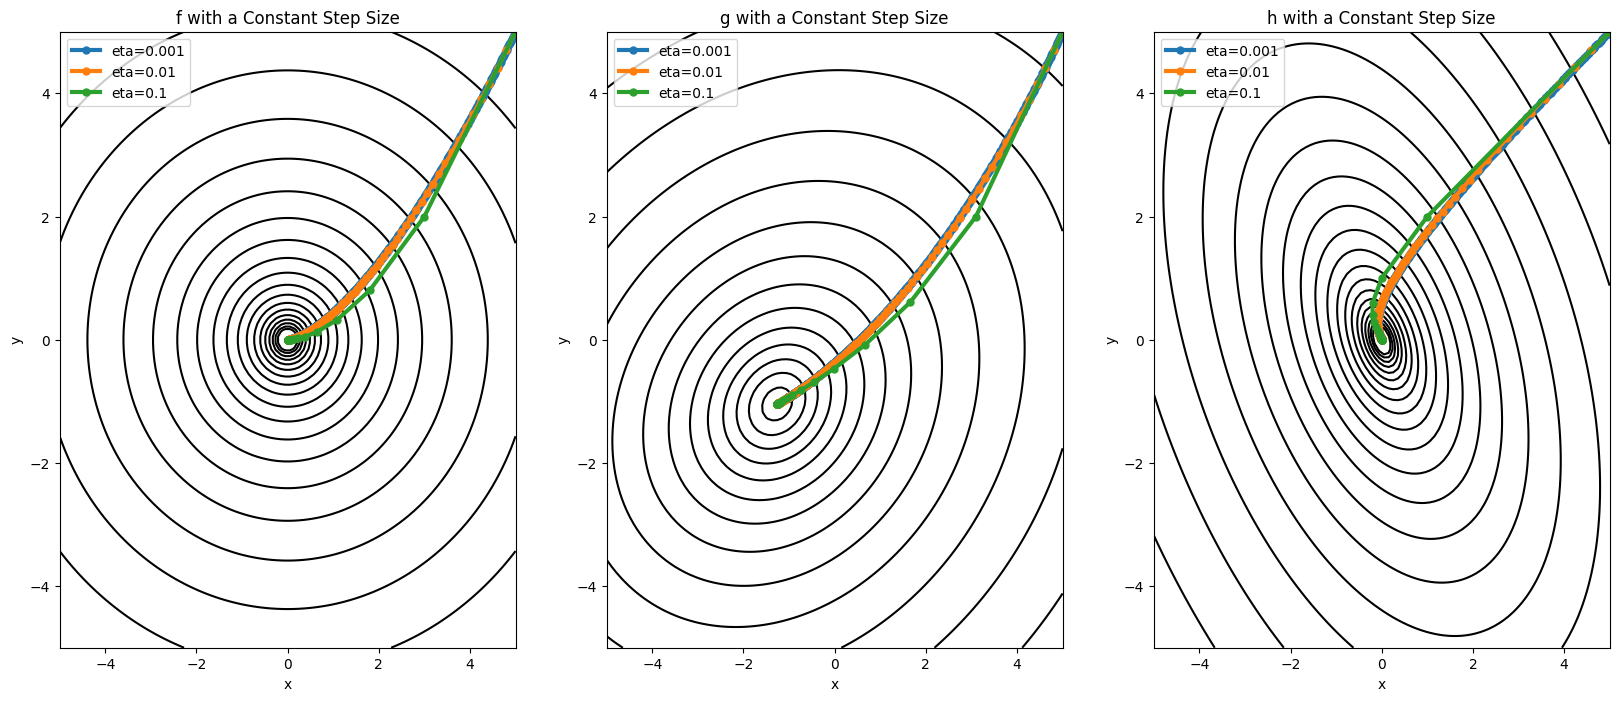

In [12]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
levels = np.logspace(-1, 4, 30)
functions = [f, g, h]
grad_functions = [grad_f, grad_g, grad_h]
etas = [0.001, 0.01, 0.1]

for i, function in enumerate(functions):
    ax = axes[i]
    ax.contour(X, Y, function([X, Y]), levels=levels, cmap='gray')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"{function.__name__} with a Constant Step Size")
    for eta in etas:
        x_init = np.array([5, 5])
        f_hist, evals, g_evals = gradient_descent_constant_step_size(function, grad_functions[i], x_init, eta, 1000)
        ax.plot(np.array(f_hist)[:, 0], np.array(f_hist)[:, 1], '-o', markersize=5, linewidth=3, label=f"eta={eta}")
    ax.legend()

plt.show()

Сравнение эффективность методов с точки зрения количества вычислений функции и ее градиентов:

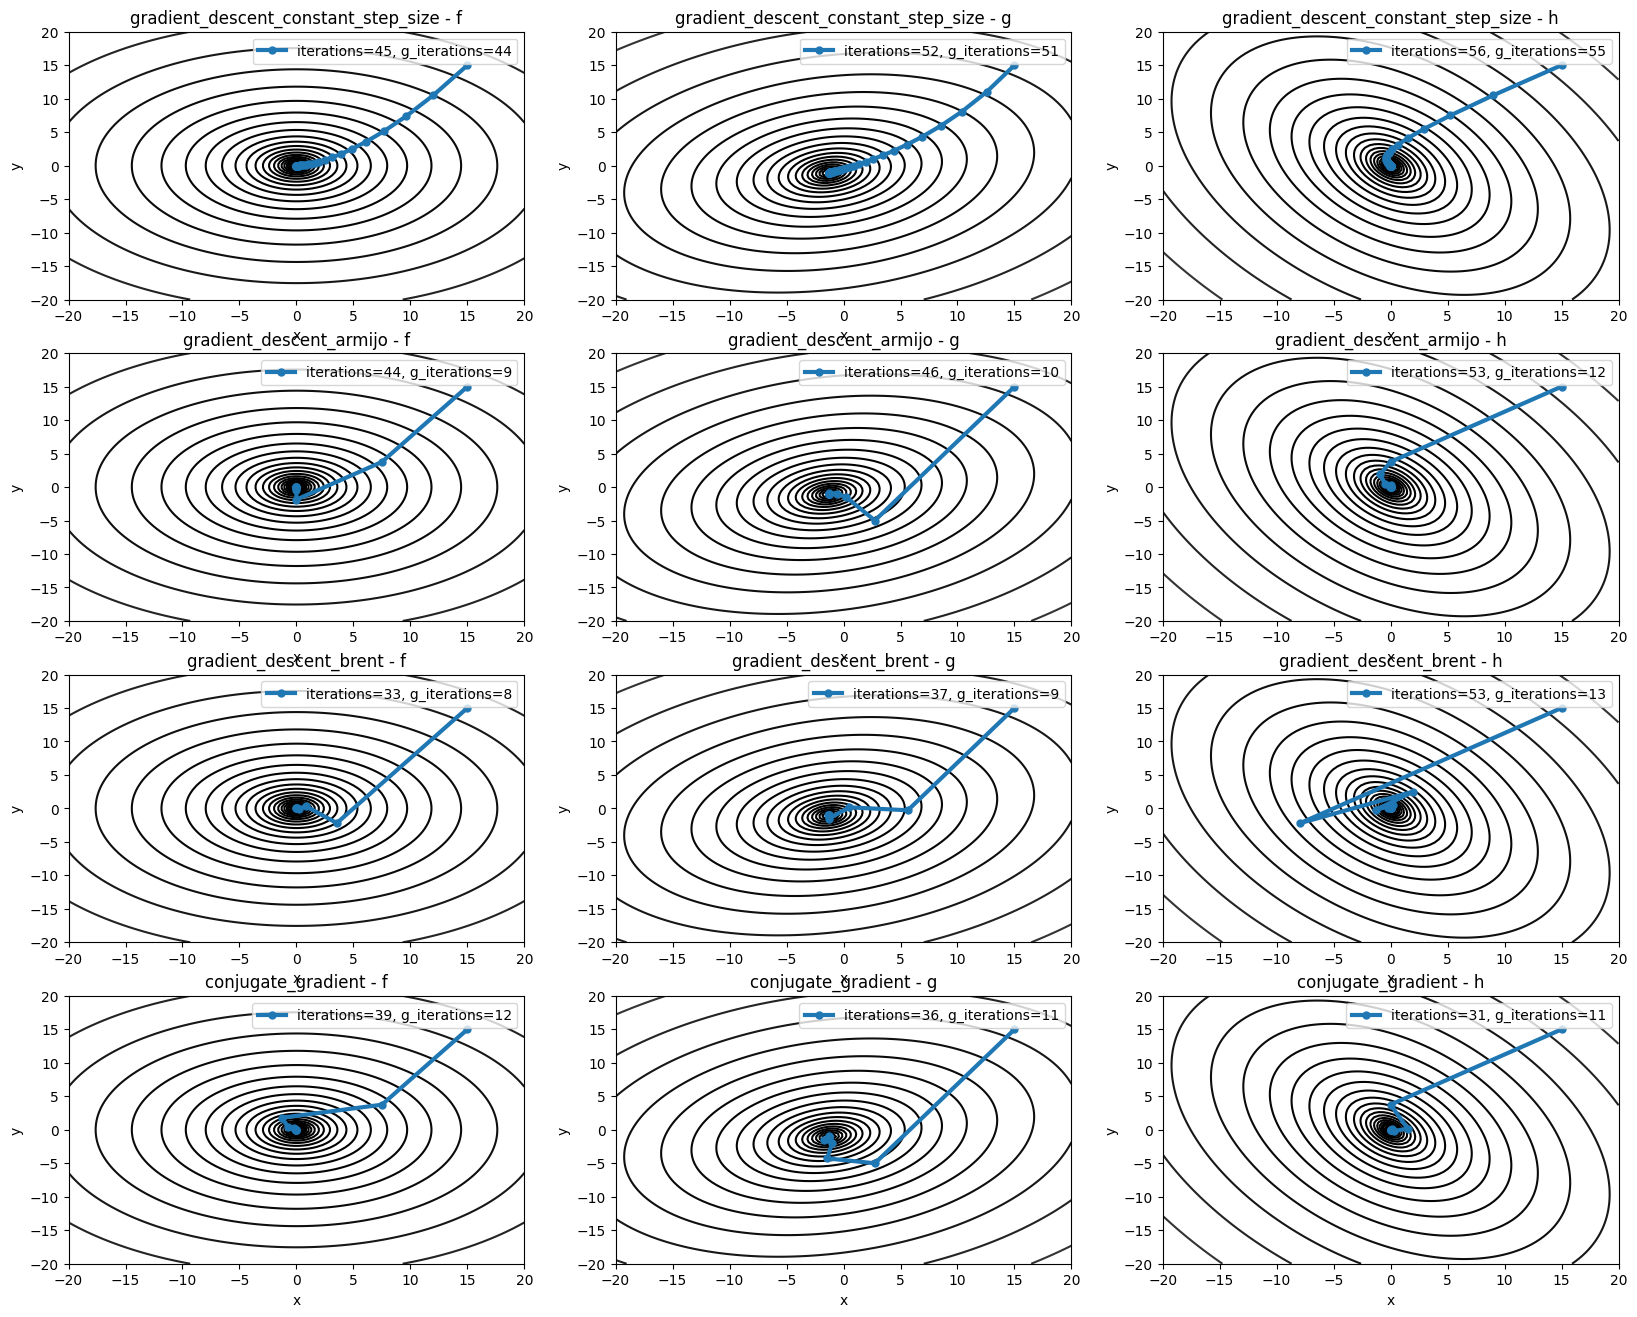

In [13]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
functions = [f, g, h]
grads = [grad_f, grad_g, grad_h]
x_starts = [np.array([15, 15])]
methods = [gradient_descent_constant_step_size, gradient_descent_armijo, gradient_descent_brent, conjugate_gradient]
eta = 0.05

fig, axes = plt.subplots(nrows=len(methods), ncols=len(functions), figsize=(20, 16))

for i, method in enumerate(methods):
    for j, function in enumerate(functions):
        ax = axes[i, j]
        ax.contour(X, Y, function([X, Y]), levels=np.logspace(-1, 4, 30), cmap='gray')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f"{method.__name__} - {function.__name__}")
        for x_start in x_starts:
            if method == gradient_descent_constant_step_size:
                f_hist, evals, g_evals = method(function, grads[j], x_start, eta)
            else:
                f_hist, evals, g_evals = method(function, grads[j], x_start)
            ax.plot(np.array(f_hist)[:, 0], np.array(f_hist)[:, 1], '-o', markersize=5, linewidth=3, label=f"iterations={evals}, g_iterations={g_evals}")
        ax.legend()
plt.show()

Сравнение работы методов от выбора начальной точки:

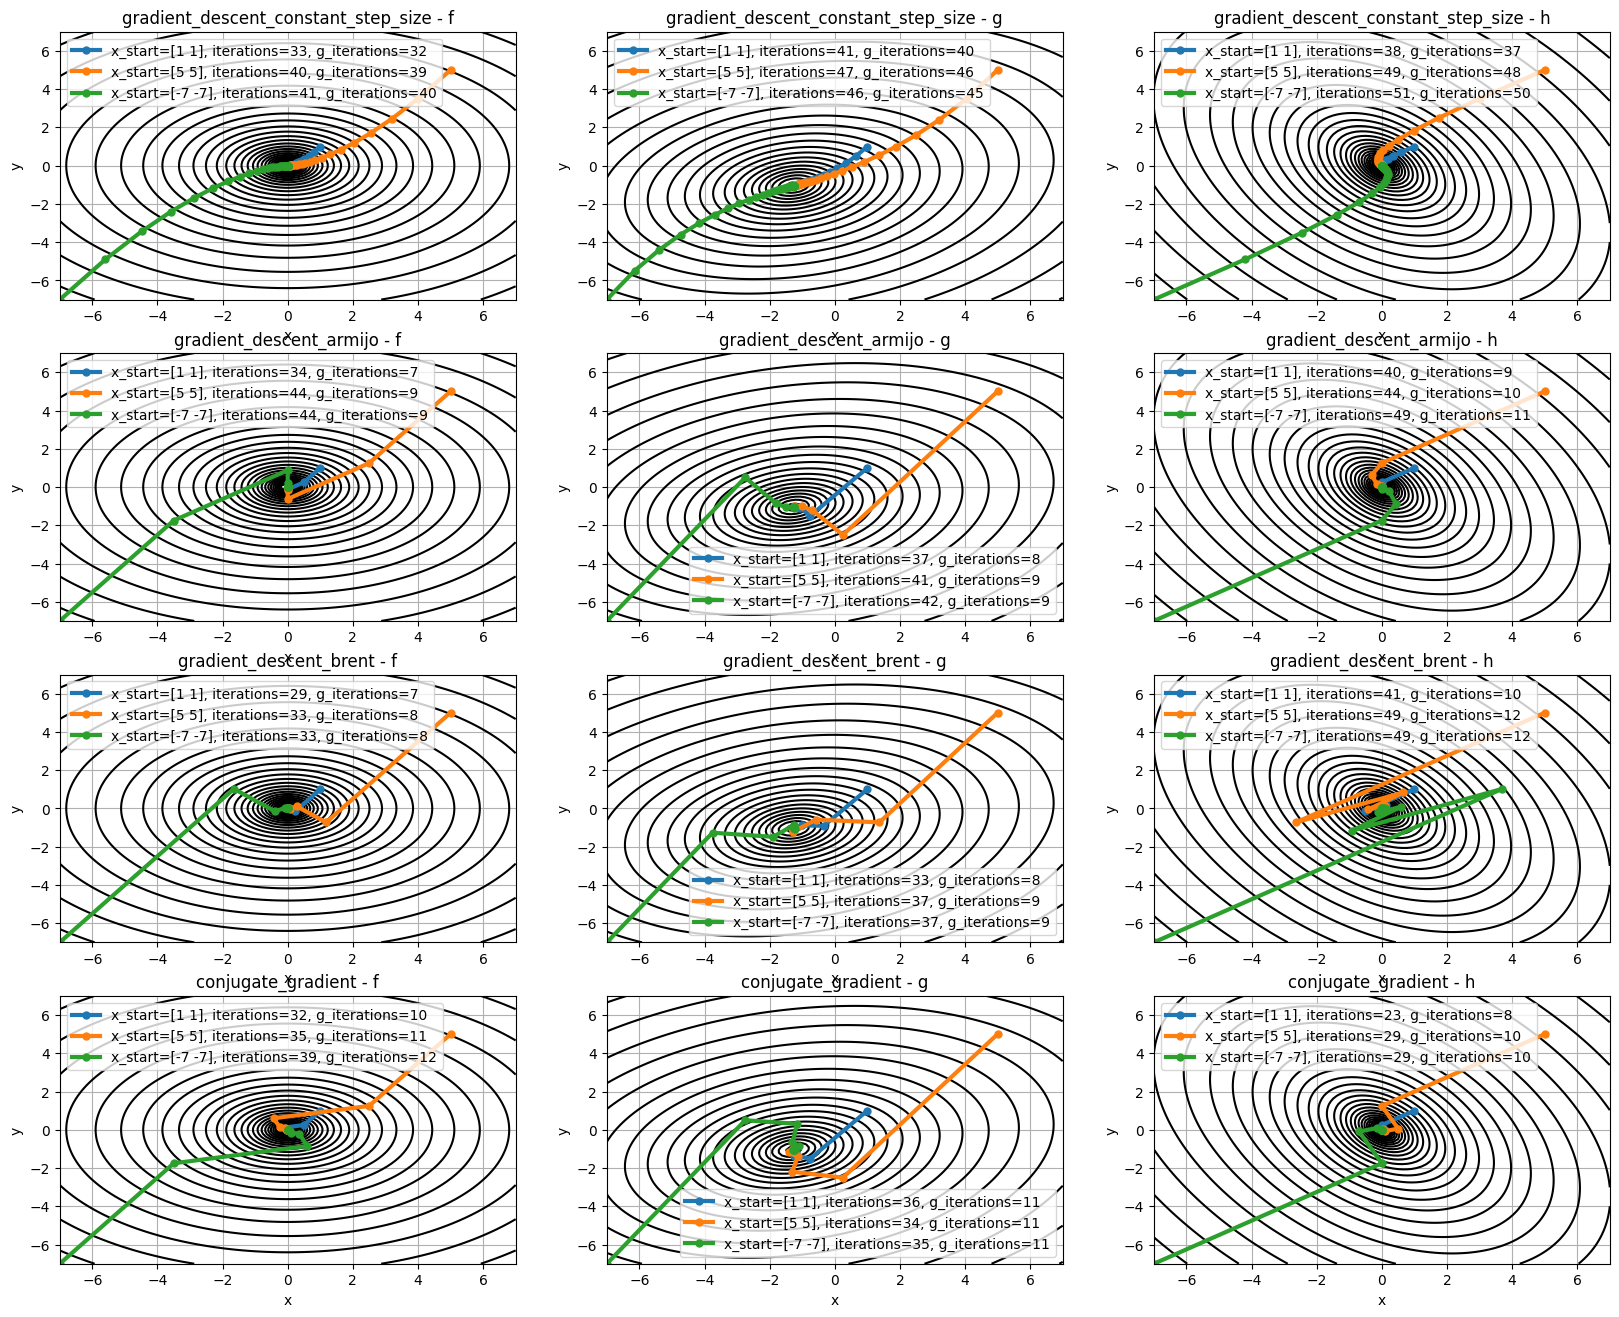

In [14]:
functions = [f, g, h]
grads = [grad_f, grad_g, grad_h]
x_starts = [np.array([1, 1]), np.array([5, 5]), np.array([-7, -7])]
methods = [gradient_descent_constant_step_size, gradient_descent_armijo, gradient_descent_brent, conjugate_gradient]
eta = 0.05

x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(nrows=len(methods), ncols=len(functions), figsize=(20, 16))

for i, method in enumerate(methods):
    for j, function in enumerate(functions):
        ax = axes[i, j]
        ax.contour(X, Y, function([X, Y]), levels=np.logspace(-1, 10, 90), cmap='gray')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f"{method.__name__} - {function.__name__}")
        ax.grid(True)
        for x_start in x_starts:
            if method == gradient_descent_constant_step_size:
                f_hist, evals, g_evals = method(function, grads[j], x_start, eta)
            else:
                f_hist, evals, g_evals = method(function, grads[j], x_start)
            ax.plot(np.array(f_hist)[:, 0], np.array(f_hist)[:, 1], '-o', markersize=5, linewidth=3, label=f"x_start={x_start}, iterations={evals}, g_iterations={g_evals}")
        ax.legend()
plt.show()

Реализация генератора случайных квадратичных функций n переменных с числом обусловленности k:

In [15]:
def generate_quadratic_function(n, k):
    # generate a random orthogonal matrix Q of size n x n
    # which preserves dot products, i.e., Q @ Q^T = Q^T @ Q = I
    Q, _ = np.linalg.qr(np.random.randn(n, n))
    
    # generate a diagonal matrix D of size n x n 
    # with increasing eigenvalues in the range [1, k]
    D = np.diag(np.linspace(1, k, n))
    
    # form a positive definite matrix A of size n x n
     #Thus, the product of Q, D and the transposed Q gives a random positive definite matrix of size nxn with a conditionality number k.
    A = Q @ D @ Q.T

    # generate a random vector b of size n
    b = np.random.randn(n)

    # define the quadratic function f and its gradient
    def f(x):
        return 0.5 * x.T @ A @ x - b.T @ x

    def grad_f(x):
        return A @ x - b

    return f, grad_f

Исследование зависимости числа итераций, необходимых градиентому спуску для сходимости в зависимости от размерности пространства и числа обусловленности оптимизируемой функции:

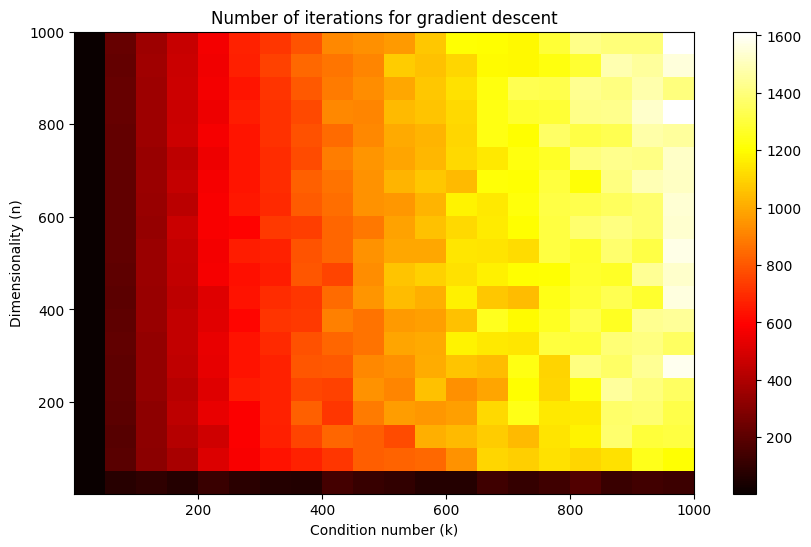

In [16]:
# Define the range of values of n and k to experiment with
n_values = np.arange(2, 1000, 50)
k_values = np.arange(1, 1000, 50)

# Define the number of experiments to perform
num_experiments = 10
# Define the starting point and learning rate for gradient descent

# Initialize the array to store the results
num_iterations = np.zeros((len(n_values), len(k_values)))

# Perform the experiments
for n_idx, n in enumerate(n_values):
    for k_idx, k in enumerate(k_values):
        total_iterations = 0
        for i in range(num_experiments):
            f, grad_f = generate_quadratic_function(n, k)
            x0 = np.ones(n)
            _, evals, _ = conjugate_gradient(f, grad_f, x0)
            total_iterations += evals
        num_iterations[n_idx, k_idx] = total_iterations / num_experiments

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(num_iterations, extent=[1, 1000, 2, 1000], aspect='auto', cmap='hot', origin='lower')
ax.set_xlabel('Condition number (k)')
ax.set_ylabel('Dimensionality (n)')
ax.set_title('Number of iterations for gradient descent')
fig.colorbar(im)
plt.show()